<a href="https://colab.research.google.com/github/shubhamkumar0/Multivariate-Time-series-VAR/blob/master/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
from google.colab import files
uploaded = files.upload()



Saving ETH-USD.csv to ETH-USD.csv


In [0]:
mdata = pd.read_csv("ETH-USD.csv")
mdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,0.674700,3.000000,0.674700,3.000000,3.000000,371
1,2015-08-07,3.000000,3.000000,0.150000,1.200000,1.200000,1438
2,2015-08-08,1.200000,1.200000,1.200000,1.200000,1.200000,0
3,2015-08-09,1.200000,1.200000,1.200000,1.200000,1.200000,0
4,2015-08-10,1.200000,1.200000,0.650400,0.990000,0.990000,7419
5,2015-08-11,0.990000,1.290000,0.905000,1.290000,1.290000,2376
6,2015-08-12,1.290000,1.880000,1.260000,1.880000,1.880000,4923
7,2015-08-13,1.880000,2.100000,1.790000,1.790000,1.790000,11070
8,2015-08-14,1.790000,1.790000,1.500000,1.790000,1.790000,14812
9,2015-08-15,1.790000,1.790000,0.500000,1.370000,1.370000,10794


In [0]:
mdata['Date'] = mdata['Date'].astype('datetime64[ns]')
mdata.set_index('Date', drop = True, inplace = True)
mdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-06,0.674700,3.000000,0.674700,3.000000,3.000000,371
2015-08-07,3.000000,3.000000,0.150000,1.200000,1.200000,1438
2015-08-08,1.200000,1.200000,1.200000,1.200000,1.200000,0
2015-08-09,1.200000,1.200000,1.200000,1.200000,1.200000,0
2015-08-10,1.200000,1.200000,0.650400,0.990000,0.990000,7419
2015-08-11,0.990000,1.290000,0.905000,1.290000,1.290000,2376
2015-08-12,1.290000,1.880000,1.260000,1.880000,1.880000,4923
2015-08-13,1.880000,2.100000,1.790000,1.790000,1.790000,11070
2015-08-14,1.790000,1.790000,1.500000,1.790000,1.790000,14812


In [0]:
mdata.shape


(1328, 6)

In [0]:
data = mdata.diff().dropna()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.325300,0.000000,-0.524700,-1.800000,-1.800000,1067.0
2015-08-08,-1.800000,-1.800000,1.050000,0.000000,0.000000,-1438.0
2015-08-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2015-08-10,0.000000,0.000000,-0.549600,-0.210000,-0.210000,7419.0
2015-08-11,-0.210000,0.090000,0.254600,0.300000,0.300000,-5043.0
2015-08-12,0.300000,0.590000,0.355000,0.590000,0.590000,2547.0
2015-08-13,0.590000,0.220000,0.530000,-0.090000,-0.090000,6147.0
2015-08-14,-0.090000,-0.310000,-0.290000,0.000000,0.000000,3742.0
2015-08-15,0.000000,0.000000,-1.000000,-0.420000,-0.420000,-4018.0


In [0]:
data.shape

(1327, 6)

In [0]:
coin_result = ts.coint(data['Open'], data['High'],return_results=False)#todo
coin_result


(-7.2243688233594865,
 2.484464719678081e-09,
 array([-3.90471842, -3.3407418 , -3.04765004]))

In [0]:
model = VAR(data)
model.select_order(1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


LinAlgError: ignored

In [0]:
results = model.fit(1)
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


LinAlgError: ignored

In [0]:
var = VAR(data.values / data.values.std(0))

In [0]:
res = var.fit(6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [0]:
np.linalg.eigvals(res.sigma_u_mle)

array([2.29061695e+00, 8.04055277e-01, 9.70905475e-02, 6.41084061e-02,
       5.32558727e-06, 9.04308076e-08])

In [0]:
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1009: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.stderr
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Mar, 2019
Time:                     09:48:11
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -31.6226
Nobs:                     1321.00    HQIC:                  -32.1674
Log likelihood:           10437.9    FPE:                7.72721e-15
AIC:                     -32.4941    Det(Omega_mle):     6.54698e-15
--------------------------------------------------------------------
Results for equation y1
              coefficient             std. error             t-stat            prob
-----------------------------------------------------------------------------------
const           -0.000001               0.000065             -0.016           0.988
L1.y1           -0.841404                    NAN                NAN             NAN
L1.y2           -0.000160               0.000105   

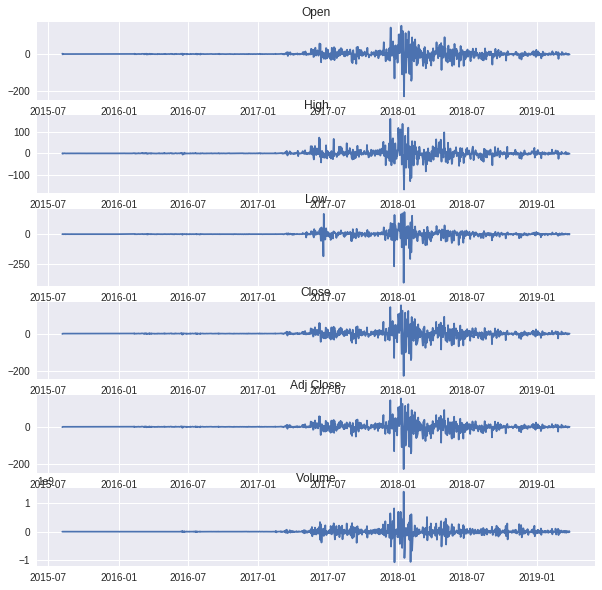

In [0]:
results.plot()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:161: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.103796e-27
  vecACF = L.solve(np.eye((k*p)**2) - np.kron(A, A), vec(SigU))


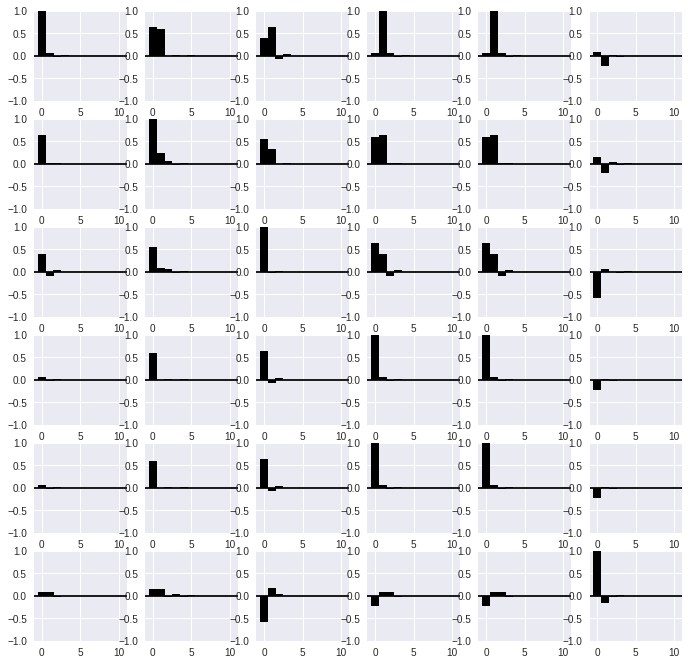

In [0]:
results.plot_acorr()

In [0]:
var.select_order(15)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


LinAlgError: ignored

In [0]:
lag_order = results.k_ar
lag_order

1

In [0]:
results.forecast(data.values[-lag_order:], 15)

array([[ 3.31549193e-01,  4.76990398e-01,  1.25932925e-01,
        -6.34278371e-02, -6.34278371e-02, -2.16550020e+06],
       [-6.40359418e-02, -1.29493412e-01, -2.79586216e-01,
         8.24590497e-02,  8.24590497e-02,  1.95278465e+06],
       [ 8.27875219e-02,  1.84235807e-01,  3.69362101e-01,
         1.53474186e-01,  1.53474186e-01, -1.02645085e+06],
       [ 1.53397504e-01,  6.93947938e-02, -4.34177620e-02,
         5.69973510e-02,  5.69973510e-02,  4.79434731e+05],
       [ 5.69956810e-02,  1.11792657e-01,  1.68124332e-01,
         1.26075343e-01,  1.26075343e-01, -1.55363520e+05],
       [ 1.26093352e-01,  9.53413270e-02,  6.98843152e-02,
         8.67901468e-02,  8.67901468e-02,  9.90308414e+04],
       [ 8.67793836e-02,  1.02910171e-01,  1.14654476e-01,
         1.06883713e-01,  1.06883713e-01, -7.22223148e+03],
       [ 1.06891324e-01,  9.88930274e-02,  9.36146960e-02,
         9.70457434e-02,  9.70457434e-02,  4.21919227e+04],
       [ 9.70440630e-02,  1.01144954e-01,  1.040

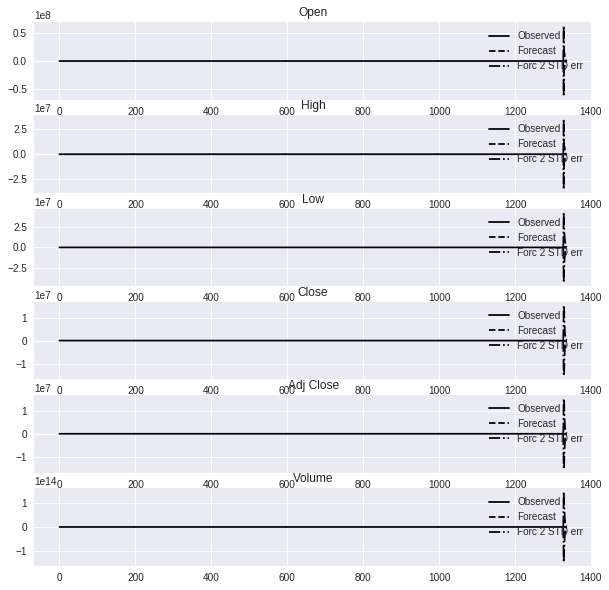

In [0]:
results.plot_forecast(10)